In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm


In [5]:
# Load the dataset
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [6]:
# Column overview
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


**Instructions**

1 For the "Median value of owner-occupied homes" provide a boxplot

2 Provide a  bar plot for the Charles river variable

3 Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

4 Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

5 Create a histogram for the pupil to teacher ratio variable

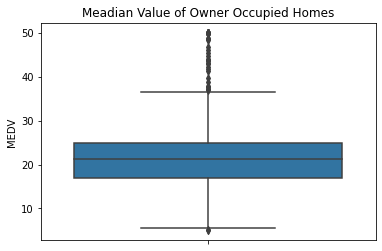

In [7]:
# Task 1 BoxPlot of Median value of owner-occupied homes

sns.boxplot( y=boston_df['MEDV'] )
plt.title('Meadian Value of Owner Occupied Homes')
plt.show()


In [ ]:
Median value is ~20, lower quartile is ~5 and upper quartile is ~38.  There are a number outliers with values between 40-50.

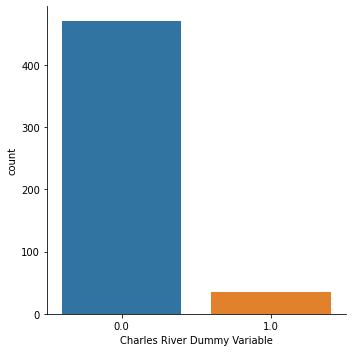

In [8]:
# Task 2 Bar Plot for the Charles River Variable  
# Think they want a count of each value of the variable
# so use catplot not barplot

sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.xlabel("Charles River Dummy Variable");



In [ ]:
As expected there are many more tracts that are NOT bounded by the river.

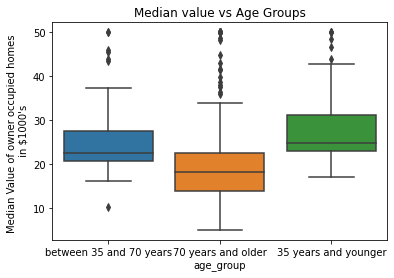

In [9]:
# Task 3  Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)



boston_df.loc[(boston_df.AGE <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[((boston_df.AGE > 35)&(boston_df.AGE < 70)), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df.AGE >= 70), 'age_group'] = '70 years and older'

ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
plt.title("Median value vs Age Groups")
plt.ylabel("Median Value of owner occupied homes \n in $1000's");

In [ ]:
Not sure the question syncs up with the data.  The variable is described as "PROPORTION of owner-occupied units built prior to 1940"
The question implies that it is the age.  


Anyway I'll follow the instructions and create the box plot.  The data shows that the
median value decrease with AGE and that the spread of data increases with AGE


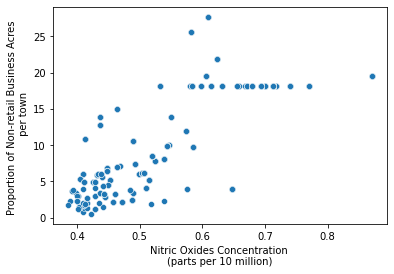

In [10]:
# Task 4 Provide a scatter plot to show the relationship between Nitric oxide concentrations 
# and the proportion of non-retail business acres per town. 


ax = sns.scatterplot(y='INDUS', x='NOX', data=boston_df)
plt.xlabel("Nitric Oxides Concentration \n(parts per 10 million)")
plt.ylabel("Proportion of Non-retail Business Acres \n per town");

What can you say about the relationship?

There is a positive relationship between the variables between concentrations of 0.4 and about 0.6 
but for concentrations above that it seems to flatten out.

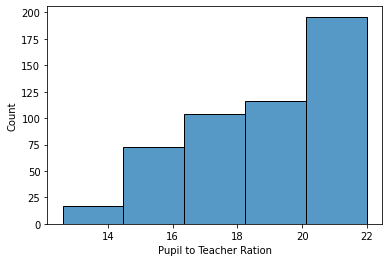

In [13]:
# Task 5 Create a histogram for the pupil to teacher ratio variable

sns.histplot(data=boston_df, x="PTRATIO",bins=5)
plt.ylabel("Count");
plt.xlabel("Pupil to Teacher Ration");

I used fewer bins to reduce the noise. The data shows that there are a wide range of values for the pupil/teacher ratio.
As expected there are fewer classrooms with small pupil/teacher ratio and more classrooms with a higher pupil/teacher ratio.


**Questions to be answered**

1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

3  Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

4 What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

* State your hypothesis.
* Use α = 0.05
* Perform the test Statistics.
* State the conclusion from the test.





__-------------------------------------------------------------------------------------------------------__

**Question 1**
Is there a significant difference in median value of houses bounded by the Charles river or not?

Null Hypothesis

*   $H_{0}: µ_{1} = µ_{2}$ There is no difference in the median value of houses bounded by Charles river and not bounded.
    
Alternate Hypothesis    
*   $H_{1}: µ_{1} ≠ µ_{2}$ There is a difference in the median value of houses bounded by Charles river and not bounded.


*   Use α = 0.05

In [28]:
scipy.stats.ttest_ind(boston_df[boston_df.CHAS == 1].MEDV,
                     boston_df[boston_df.CHAS == 0].MEDV)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Conclusion:
Since the p-value is less than 0.05, we reject the null hypothesis that there is no difference in the median value of houses bounded by Charles river and not bounded

__-------------------------------------------------------------------------------------------------------__

**Question 2**
Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

Null Hypothesis

*   $H_{0}:$ There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).
    
Alternate Hypothesis    
*   $H_{1}:$  There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).


*   Use α = 0.05

It says use ANOVA but AGE is a continuous variables between 0 and 100.  So in this case what I think we need to do is first plot MEDV vs AGE.  We will then look at the correlation coefficient and see if it's statistically significant.

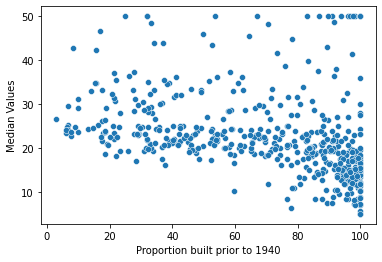

In [13]:
ax = sns.scatterplot(y='MEDV', x='AGE', data=boston_df)
plt.xlabel("Proportion built prior to 1940")
plt.ylabel("Median Values");

Equivalent Hypothesis based on correlation
Null Hypothesis
*   $H_{0}:$ There is no correlation between Median values of houses (MEDV) and AGE
    
Alternate Hypothesis    
*   $H_{1}:$ There is a correlation between Median values of houses (MEDV) and AGE

In [14]:
scipy.stats.pearsonr(boston_df['MEDV'],boston_df['AGE'])

(-0.37695456500459623, 1.5699822091877261e-18)

**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis that there is no correlation.  Equivalently there is a difference in MEDV for each proportion of owner occupied units built prior to 1940 (AGE). 
    
    
**For completeness I'll complete the analysis I think they wanted.**      

In [17]:
f_statistic,p_value = scipy.stats.f_oneway(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'], 
                                           boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                                           boston_df[boston_df['age_group'] == '70 years and older']['MEDV'])
print("F_statistic: {0}, p-value: {1}".format(f_statistic,p_value))

F_statistic: 36.40764999196599, p-value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis that there is no difference in MEDV in relation to AGE 
    
    

__-------------------------------------------------------------------------------------------------------__

**Question 3**
Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

Null Hypothesis

*   $H_{0}:$ There is no relationship between Nitric Oxide concentration and proportion of non-retail business acres per town.
    
Alternate Hypothesis    
*   $H_{1}:$  There is a relationship between Nitric Oxide concentration and proportion of non-retail business acres per town.


**Setting alpha to 0.05**

In [15]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209157, 7.913361061233745e-98)

**Conclusion:** Since the p-value is less than 0.05, we can reject the null hypothesis that there is no relationship between the nitric acid concentration and the proportion of non-retail business acres per town.

__-------------------------------------------------------------------------------------------------------__

**Question 4**
What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [21]:
X = boston_df['DIS']

y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        20:18:41   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
**Conclusion:** There is an additional impact of **1.0916** of weighted distance  to the five Boston employment centres on the median value of owner occupied homes.
    
 Also note that the p value is <0.05 so we can reject the null hypothesis that the coefficient is 0.     